<a href="https://colab.research.google.com/github/pascualcam/aiml_code/blob/main/ch10/ch9_timeseries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
def plot_series(time, series, format="-", start=0, end=None,):
  plt.plot(time[start:end], series[start:end], format)
  plt.xlabel("Time")
  plt.ylabel("Value")
  plt.grid(True)

In [4]:
def trend(time, slope=0):
  return slope * time

In [5]:
def seasonal_pattern(season_time):
  return np.where(
      season_time < 0.4,
      np.cos(season_time * 2 * np.pi),
      1 / np.exp(3 * season_time)
  )

In [6]:
def seasonality(time, period, amplitude=1, phase=0):
  season_time = ((time + phase) % period) / period
  return amplitude * seasonal_pattern(season_time)

In [7]:
def noise(time, noise_level=1, seed=None):
  rnd = np.random.RandomState(seed)
  return rnd.randn(len(time)) * noise_level

In [9]:
time = np.arange(4 * 365 + 1, dtype="float32")
baseline = 10
series = trend(time, 0.5)
amplitude = 15
slope = 0.09
noise_level = 6

# create a series
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)

# update with noise
series += noise(time, noise_level, seed=42)

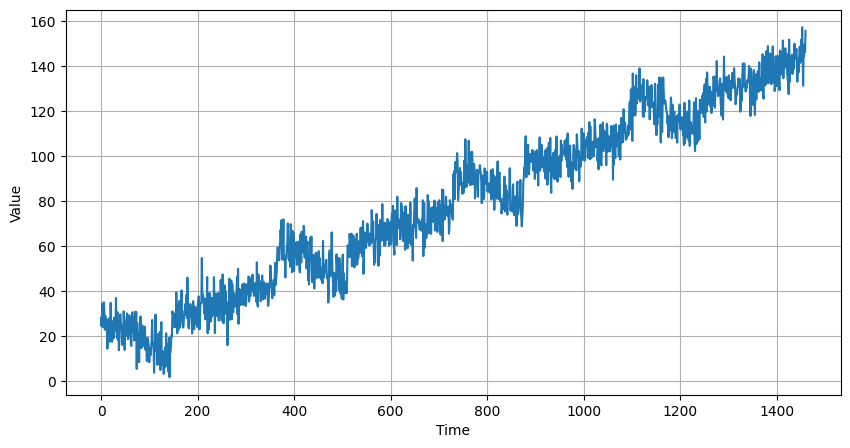

In [14]:
plt.figure(figsize=(10,5))
plot_series(time, series)

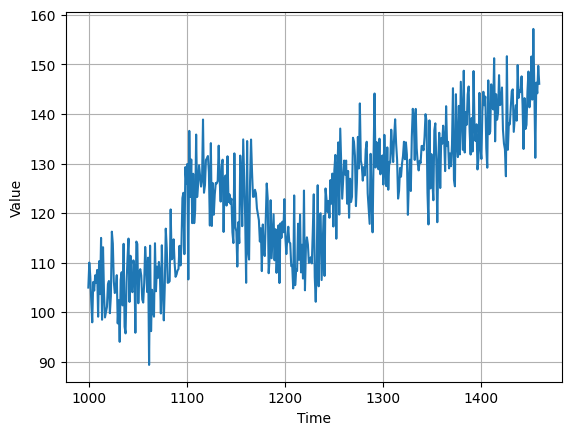

In [19]:
split_time = 1000
naive_time = time[split_time - 1:-1]
naive_forecast = series[split_time - 1:-1]
plot_series(naive_time, naive_forecast)

Prediction accuracy

In [22]:
print(tf.keras.metrics.mean_squared_error(x_valid, naive_forecast).numpy())
print(tf.keras.metrics.mean_absolute_error(x_valid, naive_forecast).numpy())

NameError: ignored

Moving Average

In [23]:
def moving_average_forecast(series, window_size):
  forecast = []
  for time in range(len(series) - window_size):
    forecast.append(series[time:time + window_size].mean())
  return np.array(forecast)

In [26]:
time_valid = time[split_time:]
x_valid = series[split_time:]

moving_average = moving_average_forecast(series, 30)[split_time - 30:]

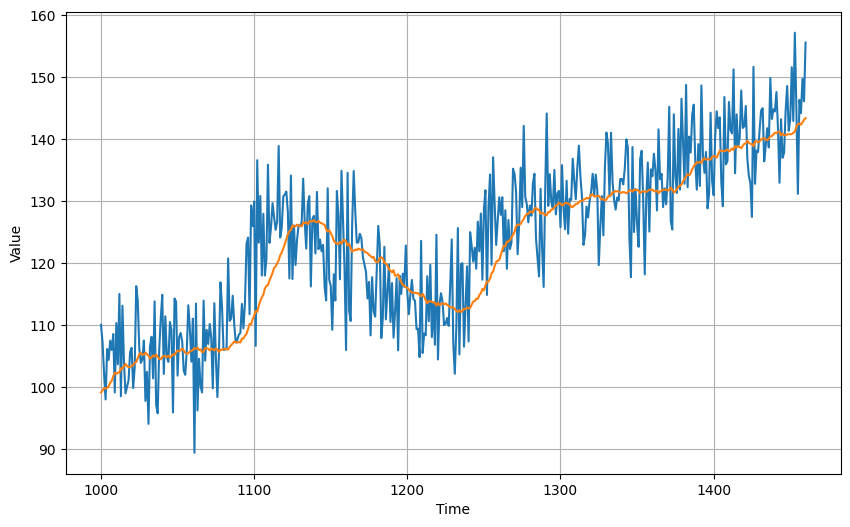

In [27]:
plt.figure(figsize=(10,6))
plot_series(time_valid, x_valid)
plot_series(time_valid, moving_average)

Smooth out: differencing

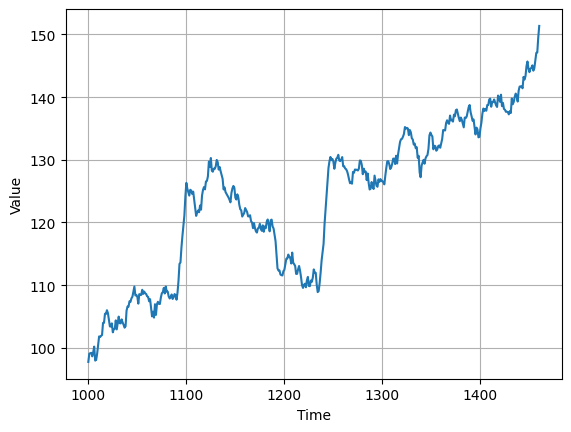

In [29]:
diff_series = (series[365:] - series[:-365])
diff_time = time[365:]
diff_moving_average = moving_average_forecast(diff_series, 50)[split_time - 365 - 50:]
diff_moving_average_plus_smooth_past = moving_average_forecast(series[split_time - 370:-360], 10) + diff_moving_average

plot_series(time_valid, diff_moving_average_plus_smooth_past)